In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns; sns.set()
%pylab inline


from sklearn import svm

import ipywidgets as widgets

# Default figure size in inches
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


# Complex network features

In [4]:
# Data generation
n_samples = 200
outliers_fraction = 0.25

n_inliers = int((1. - outliers_fraction) * n_samples)
n_outliers = int(outliers_fraction * n_samples)

offset = 1

np.random.seed(42)
X = 0.7 * np.random.randn(n_inliers, 3) - offset

# Add outliers
X = np.r_[X, np.random.uniform(low=-6, high=6, size=(n_outliers, 3))]

df_X = pd.DataFrame(X, columns=['a', 'b', 'c'])

In [5]:
# learning boundaryis for pairs of features

def norm_models(data, nu=0.01, gamma=0.001, kernel="rbf", plot=True):
    
    features = data.columns
    
    t=0

    list_used = []
    models= []
    number_e_train = 0
    number_e_test = 0

    for i in range(0,len(features)):
        for g in range(0,len(features)):
            if g != i:
                if g not in list_used:
                    list_used.append(i)
                    
                    x_data = np.array(data[[features[i],features[g]]])
                    
                    x_train = x_data[:n_inliers,:]
                    x_test = x_data[n_inliers:,:]
                    
                    clf = svm.OneClassSVM(nu=nu, kernel=kernel, gamma=gamma)
                    clf.fit(x_train)
                    models.append(clf)
                    
                    y_pred_test = clf.predict(x_test)
                    n_error_test = y_pred_test[y_pred_test == -1].size
                    number_e_test += n_error_test
                    
                    y_pred_train = clf.predict(x_train)
                    n_error_train = y_pred_train[y_pred_train == -1].size
                    number_e_train += n_error_train
                    
                    if plot:
                        
                        xl, xh = np.floor(x_test[:,0].min() - 1), np.ceil(x_test[:,0].max() + 1)
                        yl, yh = np.floor(x_test[:,1].min() - 1), np.ceil(x_test[:,1].max() + 1)
                        res = (xh-xl)/300
                        
                        #xx, yy = np.meshgrid(np.linspace(-5, 40, 500), np.linspace(-5, 40, 500))
                        xx, yy = np.meshgrid(np.arange(xl, xh, res),np.arange(yl, yh, res))
                        # plot the line, the points, and the nearest vectors to the plane
                        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
                        
                        Z = Z.reshape(xx.shape)

                        plt.title("Novelty Detection")
                        plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
                        a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
                        plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

                        s = 40
                        b1 = plt.scatter(x_train[:, 0], x_train[:, 1], c='white', s=s, edgecolors='k')
                        b2 = plt.scatter(x_test[:, 0], x_test[:, 1], c='blueviolet', s=s, edgecolors='k')

                        plt.axis('tight')
                        plt.xlim(xl, xh)
                        plt.ylim(yl, yh)
                        plt.legend([a.collections[0], b1, b2],
                                   ["learned frontier", "training observations", "testing observations"],
                                   loc="upper left",
                                   prop=matplotlib.font_manager.FontProperties(size=11))
                        plt.xlabel(
                            "error train: %d/138 "
                            % (n_error_test))


                        plt.show()
                    
                    t+=1
                    
    print(number_e_test/3/50)
    print(number_e_train/3/150)


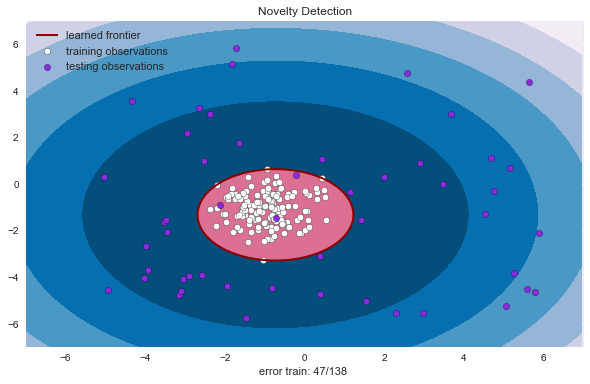

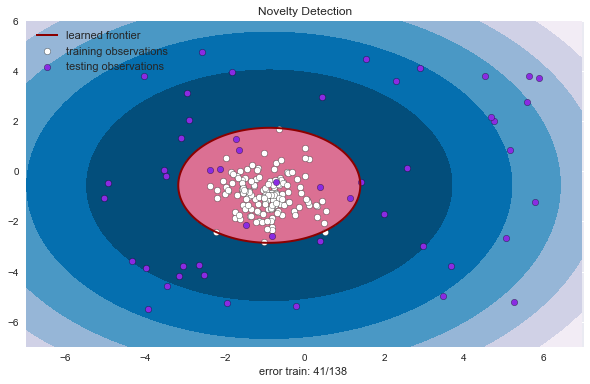

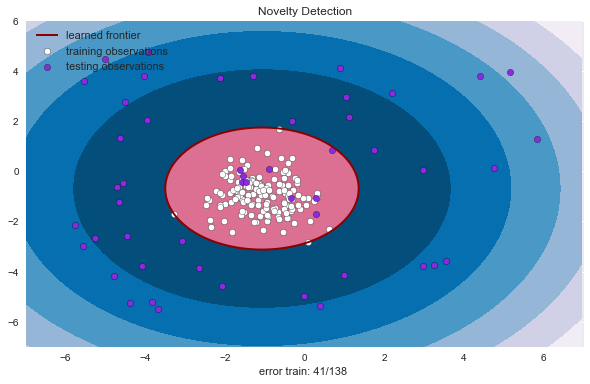

0.86
0.008888888888888889


In [10]:
norm_models(df_X)

# Interactive plots

In [8]:
def plot_interactive_OCSVM(X,features,res=None):
    
    x_data = np.array(X[features])
                    
    x_train = x_data[:n_inliers,:]
    x_test = x_data[n_inliers:,:]
    
    xl, xh = np.floor(x_test[:,0].min() - 1), np.ceil(x_test[:,0].max() + 1)
    yl, yh = np.floor(x_test[:,1].min() - 1), np.ceil(x_test[:,1].max() + 1)
   
    if res is None:
        res = (xh-xl)/300
    
    # Create grid to calculate the decision boundary on:
    xx, yy = np.meshgrid(np.arange(xl, xh, res), np.arange(yl, yh, res))
    

    
    def f(nu, gamma, kernel):
        clf = svm.OneClassSVM(nu=10**nu, gamma=10**gamma, kernel=kernel)
        print('nu',10**nu)
        print('gamma',10**gamma)
              
        clf.fit(x_train)
                 
        y_pred_test = clf.predict(x_test)
        n_error_test = y_pred_test[y_pred_test == -1].size
                    
        y_pred_train = clf.predict(x_train)
        n_error_train = y_pred_train[y_pred_train == -1].size
        
        # plot the line, the points, and the nearest vectors to the plane
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])

        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
        a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='darkred')
        plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='palevioletred')

        s = 40
        b1 = plt.scatter(x_train[:, 0], x_train[:, 1], c='white', s=s, edgecolors='k')
        b2 = plt.scatter(x_test[:, 0], x_test[:, 1], c='blueviolet', s=s, edgecolors='k')

        plt.axis('tight')
        plt.xlim(xl, xh)
        plt.ylim(yl, yh)
        plt.legend([a.collections[0], b1, b2], ["learned frontier", "training observations", "testing observations"],
                                       loc="upper left",
                                       prop=matplotlib.font_manager.FontProperties(size=11))
        plt.xlabel("error train: %d/150, error test: %d/50  " % (n_error_train ,n_error_test))
        
        plt.show()

                       
    _ = widgets.interact(f, 
                        kernel=widgets.RadioButtons(options=("rbf", "linear")),
                        nu=widgets.IntSlider(min=-5, max=0, step=1, value=-2, description='log'),
                        gamma=widgets.IntSlider(min=-5, max=5, step=1, value=-2, description='log $\gamma$'))

                   


In [9]:
plot_interactive_OCSVM(df_X,['a','b'])

interactive(children=(IntSlider(value=-2, description='log', max=0, min=-5), IntSlider(value=-2, description='…

In [10]:
plot_interactive_OCSVM(df_X,['a','c'])

interactive(children=(IntSlider(value=-2, description='log', max=0, min=-5), IntSlider(value=-2, description='…

In [11]:
plot_interactive_OCSVM(df_X,['b','c'])

interactive(children=(IntSlider(value=-2, description='log', max=0, min=-5), IntSlider(value=-2, description='…